In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

from autoencoder import Autoencoder, Autoencoder_cnn
from stacked_mnist import StackedMNISTData, DataMode

In [132]:
#transform = transforms.ToTensor()
#mnist_data = datasets.MNIST(root = './data', train=True, download=True, transform=transform)
##data_loader = torch.utils.data.DataLoader(dataset=mnist_data, 
  #                                        batch_size=64,
   #                                       shuffle=True)

## Convolutional Autoencoder

In [3]:
model = Autoencoder_cnn(criterion = nn.MSELoss())
#criterion = nn.MSELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [4]:
gen = StackedMNISTData(mode=DataMode.MONO_FLOAT_COMPLETE)

In [104]:
#dataset = gen.get_full_data_set()

In [121]:
#torch.tensor(dataset[0],dtype=torch.float32).permute(0,3,1,2).shape

torch.Size([60000, 1, 28, 28])

In [129]:
num_epochs = 4
outputs = []
u=0
for epoch in range(num_epochs):
    for (img,_) in gen.batch_generator(training=True, batch_size=64):
        img = torch.tensor(img, dtype=torch.float32)
        img = img.permute(0,3,1,2)
      #  recon = model(img)
       # loss = criterion(recon,img)
       # optimizer.zero_grad()
        #loss.backward()
        #optimizer.step()
   # print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
   # outputs.append((epoch,img,recon))


3752


In [130]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2,9,i+1)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2,9,9+i+1)
        plt.imshow(item[0])

SyntaxError: invalid syntax (3299433231.py, line 1)

# Assignment

In [5]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=10)
#img, cls = gen.get_random_batch(batch_size=10)
#gen.plot_example(images=img, labels=cls)

for (img, cls) in gen.batch_generator(training=False, batch_size=2048):
    print(f"Batch has size: Images: {img.shape}; Labels {cls.shape}")

Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)
Batch has size: Images: (1808, 28, 28, 1); Labels (1808,)


In [38]:
model = Autoencoder_cnn(criterion = nn.MSELoss())
#criterion =  nn.MSELoss() #nn.BCELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
gen = StackedMNISTData(mode=DataMode.MONO_FLOAT_COMPLETE, default_batch_size=10)

In [7]:
#num_epochs = 10
#outputs = []

#for epoch in range(num_epochs):
 #   for (img,_) in gen.batch_generator(training=True, batch_size=64):
  #      img = torch.tensor(img, dtype=torch.float32)
   #     img = img.permute(0,3,1,2)
    #    recon = model(img)
     #   loss = criterion(recon,img)
     #   optimizer.zero_grad()
      #  loss.backward()
       # optimizer.step()
    #print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
    #outputs.append((epoch,img,recon))

In [ ]:
#for k in range(0, num_epochs, 4):
 #   plt.figure(figsize=(9,2))
  #  plt.gray()
   # imgs = outputs[k][1].detach().numpy()
    #recon = outputs[k][2].detach().numpy()
    #for i, item in enumerate(imgs):
     #   if i >= 9: break
      #  plt.subplot(2,9,i+1)
      #  plt.imshow(item[0])
            
    #for i, item in enumerate(recon):
     #   if i >= 9: break
      #  plt.subplot(2,9,9+i+1)
       # plt.imshow(item[0])

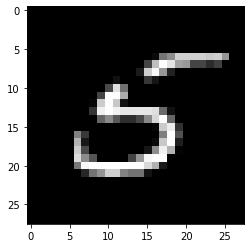

In [100]:
#for (img,_) in gen.batch_generator(training=True, batch_size=64):
 #   img = torch.tensor(img, dtype=torch.float32)
  #  #print(img.permute(0,3,1,2).shape)
   # plt.imshow(img.permute(0,3,1,2)[0][0])
    #img = img.permute(0,3,1,2)

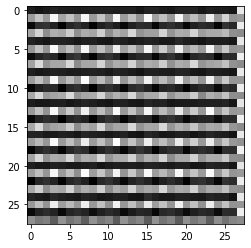

In [143]:
gen = StackedMNISTData(mode=DataMode.MONO_FLOAT_COMPLETE, default_batch_size=64)
batch_generator = gen.batch_generator(training=True, batch_size=64)

for epoch in range(num_epochs):
    for img,_ in batch_generator: 
        img = torch.tensor(img, dtype=torch.float32)
        img = img.permute(0,3,1,2)
        recon = model(img)
        #if torch.any(torch.isnan(img)).item():
         #   print(torch.any(torch.isnan(img)))
        plt.imshow(recon.detach().numpy()[0][0])

In [146]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root = './data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, 
                                            batch_size=64,
                                            shuffle=True)
model = Autoencoder_cnn()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


num_epochs = 4
outputs = []
u=0


for epoch in range(num_epochs):
    for (img,_) in data_loader:  #TODO this works 
        recon = model(img)
        loss = criterion(recon,img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
    outputs.append((epoch,img,recon))

Epoch:1, Loss:0.0069
Epoch:2, Loss:0.0050
Epoch:3, Loss:0.0035
Epoch:4, Loss:0.0032


In [ ]:
gen = StackedMNISTData(mode=DataMode.MONO_FLOAT_COMPLETE, default_batch_size=64)
batch_generator = gen.batch_generator(training=True, batch_size=64)

for img,_ in batch_generator: 
    img = torch.tensor(img, dtype=torch.float32)
    img = img.permute(0,3,1,2)
       # recon = model(img)
        #if torch.any(torch.isnan(img)).item():
         #   print(torch.any(torch.isnan(img)))
       # plt.imshow(recon.detach().numpy()[0][0])

In [152]:
img.shape

torch.Size([32, 1, 28, 28])

In [149]:
recon = model(img)

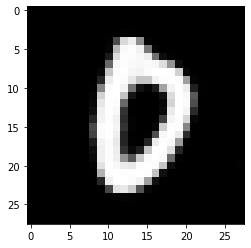

In [150]:
plt.imshow(recon.detach().numpy()[0][0])